# A Regression on Height of Japanese Students

I will be making a regression model on height of Japanese students based on characterisitcs such as age, weight, and gender.

Dataset: https://www.kaggle.com/datasets/risakashiwabara/jpmean-and-standard-deviation-of-height-and-weight

In [143]:
# Importing the basic packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns

### Data Cleaning and Preparing to Create the Regression Model

In [144]:
# Importing the datasets
df_male = pd.read_csv('man.csv')
df_female = pd.read_csv('woman.csv')

In [145]:
df_male.head()

,year,category,height_average,height_standard deviation,body weight _average,body weight _standard deviation
0,5,national,111.0,4.87,19.3,2.79
1,5,Hokkaido,111.3,4.81,19.3,2.83
2,5,Aomori,111.8,4.87,19.9,2.78
3,5,Iwate,111.0,5.08,19.6,3.02
4,5,Miyagi,111.3,4.90,19.7,3.04


In [146]:
df_female.head()

,year,category,height_average_1,height_standard deviation_2,body weight _average_3,body weight _standard deviation_4
0,5,national,110.1,4.86,19.0,2.74
1,5,Hokkaido,110.1,4.90,18.9,2.98
2,5,Aomori,111.0,4.95,19.5,2.98
3,5,Iwate,110.6,4.72,19.3,2.91
4,5,Miyagi,110.6,4.91,19.5,2.88


In [147]:
df_male.describe()

,year,height_average,height_standard deviation,body weight _average,body weight _standard deviation
count,624.000000,624.000000,624.000000,624.000000,624.000000
mean,11.000000,145.072917,6.072420,40.986218,7.869792
std,3.744659,20.507207,0.942226,14.991854,2.932388
min,5.000000,110.000000,4.460000,18.900000,2.300000
25%,8.000000,128.000000,5.350000,27.400000,5.210000
50%,11.000000,145.900000,5.900000,39.650000,8.910000
75%,14.000000,166.000000,6.662500,55.225000,10.320000
max,17.000000,171.900000,8.270000,65.900000,13.700000


In [148]:
df_female.describe()

,year,height_average_1,height_standard deviation_2,body weight _average_3,body weight _standard deviation_4
count,624.000000,624.000000,624.000000,624.000000,624.000000
mean,11.000000,141.044872,5.589071,38.188942,6.406394
std,3.744659,16.618844,0.594624,12.175350,1.908674
min,5.000000,109.400000,4.420000,18.600000,2.410000
25%,8.000000,127.475000,5.180000,26.875000,4.780000
50%,11.000000,147.200000,5.445000,40.000000,7.220000
75%,14.000000,156.500000,5.930000,50.425000,7.842500
max,17.000000,159.200000,7.330000,54.600000,9.740000


In [149]:
# Creating a gender column so I know what gender they are for when I combine the datasets together
df_male['Gender'] = 'Male'
df_female['Gender'] = 'Female'

In [150]:
df_male.head()

,year,category,height_average,height_standard deviation,body weight _average,body weight _standard deviation,Gender
0,5,national,111.0,4.87,19.3,2.79,Male
1,5,Hokkaido,111.3,4.81,19.3,2.83,Male
2,5,Aomori,111.8,4.87,19.9,2.78,Male
3,5,Iwate,111.0,5.08,19.6,3.02,Male
4,5,Miyagi,111.3,4.90,19.7,3.04,Male


In [151]:
df_female.head()

,year,category,height_average_1,height_standard deviation_2,body weight _average_3,body weight _standard deviation_4,Gender
0,5,national,110.1,4.86,19.0,2.74,Female
1,5,Hokkaido,110.1,4.90,18.9,2.98,Female
2,5,Aomori,111.0,4.95,19.5,2.98,Female
3,5,Iwate,110.6,4.72,19.3,2.91,Female
4,5,Miyagi,110.6,4.91,19.5,2.88,Female


In [152]:
df_male.describe()

,year,height_average,height_standard deviation,body weight _average,body weight _standard deviation
count,624.000000,624.000000,624.000000,624.000000,624.000000
mean,11.000000,145.072917,6.072420,40.986218,7.869792
std,3.744659,20.507207,0.942226,14.991854,2.932388
min,5.000000,110.000000,4.460000,18.900000,2.300000
25%,8.000000,128.000000,5.350000,27.400000,5.210000
50%,11.000000,145.900000,5.900000,39.650000,8.910000
75%,14.000000,166.000000,6.662500,55.225000,10.320000
max,17.000000,171.900000,8.270000,65.900000,13.700000


In [153]:
df_female.describe()

,year,height_average_1,height_standard deviation_2,body weight _average_3,body weight _standard deviation_4
count,624.000000,624.000000,624.000000,624.000000,624.000000
mean,11.000000,141.044872,5.589071,38.188942,6.406394
std,3.744659,16.618844,0.594624,12.175350,1.908674
min,5.000000,109.400000,4.420000,18.600000,2.410000
25%,8.000000,127.475000,5.180000,26.875000,4.780000
50%,11.000000,147.200000,5.445000,40.000000,7.220000
75%,14.000000,156.500000,5.930000,50.425000,7.842500
max,17.000000,159.200000,7.330000,54.600000,9.740000


In [154]:
# Renaming the columns for the female dataset to match the male dataset
df_female = df_female.rename(columns = {'height_average_1':'height_average', 
                                        'height_standard deviation_2': 'height_standard deviation', 
                                        'body weight _average_3': 'body weight _average',
                                        'body weight _standard deviation_4': 'body weight _standard deviation'})

In [155]:
df_female.head()

,year,category,height_average,height_standard deviation,body weight _average,body weight _standard deviation,Gender
0,5,national,110.1,4.86,19.0,2.74,Female
1,5,Hokkaido,110.1,4.90,18.9,2.98,Female
2,5,Aomori,111.0,4.95,19.5,2.98,Female
3,5,Iwate,110.6,4.72,19.3,2.91,Female
4,5,Miyagi,110.6,4.91,19.5,2.88,Female


In [156]:
# Combining the datasets together
df_all = pd.concat([df_male, df_female], axis = 0)

In [157]:
df_all.head()

,year,category,height_average,height_standard deviation,body weight _average,body weight _standard deviation,Gender
0,5,national,111.0,4.87,19.3,2.79,Male
1,5,Hokkaido,111.3,4.81,19.3,2.83,Male
2,5,Aomori,111.8,4.87,19.9,2.78,Male
3,5,Iwate,111.0,5.08,19.6,3.02,Male
4,5,Miyagi,111.3,4.90,19.7,3.04,Male


In [158]:
df_all.dtypes

year                                 int64
category                            object
height_average                     float64
height_standard deviation          float64
body weight _average               float64
body weight _standard deviation    float64
Gender                              object
dtype: object

In [159]:
df_all.isnull().sum()

year                               0
category                           0
height_average                     0
height_standard deviation          0
body weight _average               0
body weight _standard deviation    0
Gender                             0
dtype: int64

In [160]:
# Renaming cateogry column to prefecture so its easier to understand what this column is

df_all.rename(columns={'category':'prefecture', 'body weight _average':'body_weight', 'height_average':'height'}, inplace = True)

In [161]:
# Making the gender column numeric
df_all = pd.get_dummies(df_all, columns = ['Gender'], dtype = 'int')

In [162]:
df_all.head()

,year,prefecture,height,height_standard deviation,body_weight,body weight _standard deviation,Gender_Female,Gender_Male
0,5,national,111.0,4.87,19.3,2.79,0,1
1,5,Hokkaido,111.3,4.81,19.3,2.83,0,1
2,5,Aomori,111.8,4.87,19.9,2.78,0,1
3,5,Iwate,111.0,5.08,19.6,3.02,0,1
4,5,Miyagi,111.3,4.90,19.7,3.04,0,1


I want to start off with a simple regression model using only the variables age, body weight, and gender.

In [163]:
from sklearn.model_selection import train_test_split

# split data between X and y
# removing any columns I felt were not needed for the regression most notably the standard deviations of the metrics I am already using

X = df_all.drop(['height', 'height_standard deviation', 'body weight _standard deviation', 'prefecture'], axis = 1)
y = df_all['height']

In [164]:
X.head()

,year,body_weight,Gender_Female,Gender_Male
0,5,19.3,0,1
1,5,19.3,0,1
2,5,19.9,0,1
3,5,19.6,0,1
4,5,19.7,0,1


In [165]:
y.head()

0    111.0
1    111.3
2    111.8
3    111.0
4    111.3
Name: height, dtype: float64

In [166]:
X.shape, y.shape

((1248, 4), (1248,))

In [167]:
# Split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [168]:
# Getting a visual on the split
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (998, 4) (998,)
Testing set shape:  (250, 4) (250,)


### Making Regression Model

In [169]:
from sklearn import linear_model

In [170]:
# Creating the linear regression model
lr = linear_model.LinearRegression()

In [171]:
# Trains the data on the training set
# Takes the data and tries to fit it into the line
lr.fit(X_train, y_train)

LinearRegression()

In [172]:
# Predict on the testing set
y_pred = lr.predict(X_test)

In [173]:
# These are all the predicted heights of all the students in the X_test dataset
y_pred

array([118.85815565, 137.68465104, 137.24656   , 138.27055628,
       143.12321048, 164.69062957, 136.81025284, 118.27581814,
       115.9056798 , 141.95318385, 160.92570959, 115.61183524,
       131.07963271, 132.54172003, 144.4356997 , 157.06339884,
       153.55688671, 160.37524104, 121.08226364, 158.36446906,
       149.87247527, 115.17374421, 157.97144987, 118.27403427,
       158.52370228, 173.55340872, 133.70996278, 116.34198696,
       160.84698491, 148.99629321, 174.72165148, 125.20476611,
       131.66553796, 164.54459923, 159.53271181, 172.02579962,
       157.20942919, 146.33587805, 150.89647155, 126.95891411,
       143.41348729, 154.43306877, 150.31235017, 149.28835389,
       153.26482602, 115.4658049 , 175.4518032 , 157.50148987,
       126.37300887, 171.18327038, 141.51509282, 160.6336489 ,
       118.42006461, 119.29803055, 135.78625656, 136.22613146,
       132.83199684, 121.52035467, 114.88168352, 115.31977455,
       175.59783354, 118.42184848, 119.00596986, 150.16

In [174]:
y_pred.shape

(250,)

In [175]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Evalute the Performance of the Model

In [176]:
# Evaluate the performance of the model

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae = mean_absolute_error(y_test, y_pred) 

intercept = lr.intercept_

coefficient = lr.coef_

In [177]:
X.shape

(1248, 4)

In [178]:
# Get adjusted r-square score
n = 1248
p = 4

Adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

In [179]:
# Full summary statistics
print('R2 score: ', r2)
print('Adjusted R2 score: ', Adj_r2)
print('mean_squared_error: ', mse)
print('root_mean_squared_error: ', rmse)
print('mean_absolute_error: ', mae)
print('Intercept: ', intercept)
print('Coefficient: ', coefficient)

R2 score:  0.976041773683146
Adjusted R2 score:  0.9759646756097209
mean_squared_error:  8.13309678779269
root_mean_squared_error:  2.8518584796221376
mean_absolute_error:  2.4293839285728573
Intercept:  89.67010725808464
Coefficient:  [-0.4044382   1.46030344  0.07212324 -0.07212324]


The R<sup>2</sup> was quite high at 97.6%. This means that the 97.6% of the variance of the height is explained by the independent variables. The results were going to be quite obvious where the age, weight, and gender most definitely impacts the height but was it was good to see that I got a high R<sup>2</sup> value.

The adjusted R<sup>2</sup> was just a tiny bit under the R<sup>2</sup> which means that there variables I used have some significance to it.

The mean squared error is quite low at around 8.13. This means that the root mean squared error is also low at 2.85. These values provide an estimation on how well the model was able to predict the target value.

The mean absolute error is also quite low at 2.43 which tells me the average magnitude of error was quite low.

In [180]:
# Creates a dataframe of the coefficients and the coefficient values so I can see what the value each coefficient got
coeff_val = []
for i in coefficient:
    coeff_val.append(i)


coeff_name = []
for i in X.columns:
    coeff_name.append(i)

df_coeff = pd.DataFrame({'Coeff Name':coeff_name, 'Coeff Value':coeff_val})

In [181]:
df_coeff

,Coeff Name,Coeff Value
0,year,-0.404438
1,body_weight,1.460303
2,Gender_Female,0.072123
3,Gender_Male,-0.072123


The regression function looks something like: \

height = 89.67 - 0.4<em>year</em> + 1.46<em>body_weight</em> + 0.072<em>female</em> - 0.072<em>male</em>

Interesting to see that year has a negative coefficient value of -0.04 since your height should increase as you get older especially when you are a student (ages between 5-17). It is also interesting to see that males have a negative coefficient as well.

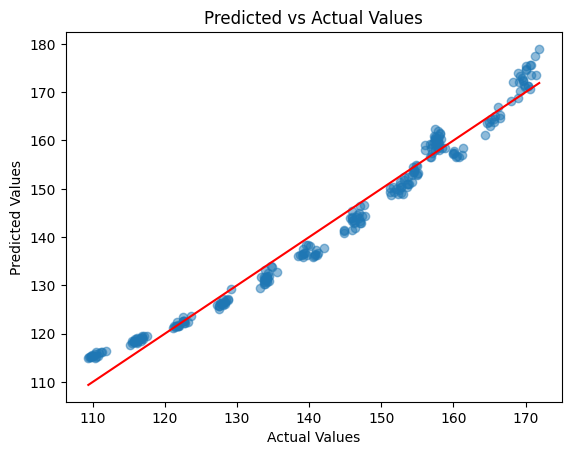

In [182]:
# Plot predicted values against the actual values
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

The best fit line looks to be pretty well in-line with the scatter plot

In [183]:
# Getting info on the residuals
residuals = y_test - y_pred

residuals.describe()

count    250.000000
mean       0.138416
std        2.854212
min       -7.056531
25%       -2.393208
50%        0.757587
75%        2.476784
max        4.875652
Name: height, dtype: float64

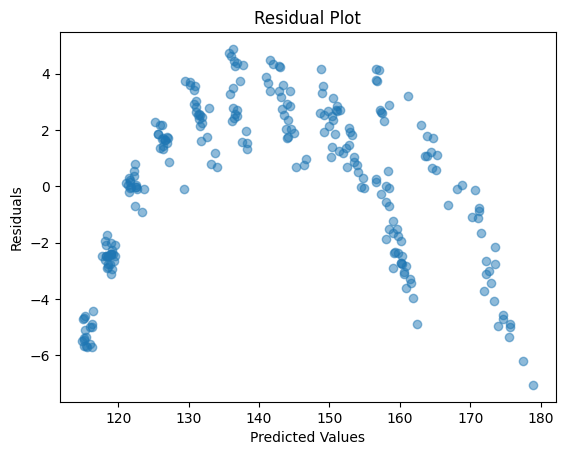

In [184]:
# Plotting the residuals

plt.scatter(y_pred, residuals, alpha = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

You can see an obvious pattern with the residual plots which isn't good. This means that a non-linear model may be a better fit for this dataset.

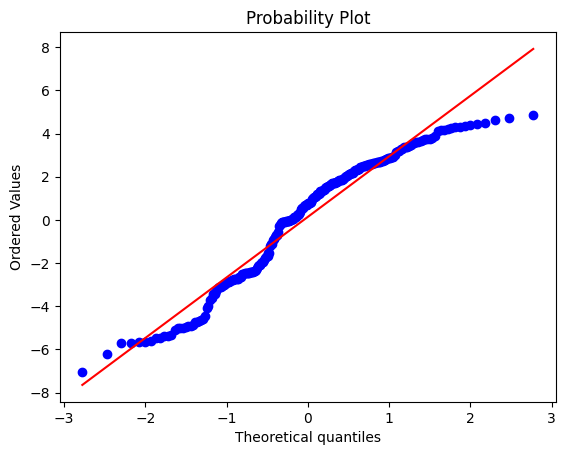

In [185]:
# Q-Q plot
stats.probplot(residuals, dist = 'norm', plot = plt);

The Q-Q plot tends to have in and out of the line meaning that ther residuals are not very normally distributed.

### Next Step

I will try see if adding a log to both height and weight would affect the results.

### Non-linear Regression

In [186]:
df_all.head()

,year,prefecture,height,height_standard deviation,body_weight,body weight _standard deviation,Gender_Female,Gender_Male
0,5,national,111.0,4.87,19.3,2.79,0,1
1,5,Hokkaido,111.3,4.81,19.3,2.83,0,1
2,5,Aomori,111.8,4.87,19.9,2.78,0,1
3,5,Iwate,111.0,5.08,19.6,3.02,0,1
4,5,Miyagi,111.3,4.90,19.7,3.04,0,1


In [187]:
df_all_2 = df_all.copy()

In [188]:
# Log both height and weight
df_all_2['log_height'] = np.log(df_all_2['height'])
df_all_2['log_body_weight'] = np.log(df_all_2['body_weight'])

In [189]:
df_all_2.head()

,year,prefecture,height,height_standard deviation,body_weight,body weight _standard deviation,Gender_Female,Gender_Male,log_height,log_body_weight
0,5,national,111.0,4.87,19.3,2.79,0,1,4.709530,2.960105
1,5,Hokkaido,111.3,4.81,19.3,2.83,0,1,4.712229,2.960105
2,5,Aomori,111.8,4.87,19.9,2.78,0,1,4.716712,2.990720
3,5,Iwate,111.0,5.08,19.6,3.02,0,1,4.709530,2.975530
4,5,Miyagi,111.3,4.90,19.7,3.04,0,1,4.712229,2.980619


In [190]:
X2 = df_all_2.drop(['height', 'height_standard deviation', 'body weight _standard deviation', 'prefecture', 'body_weight', 'log_height'], axis = 1)
y2 = df_all_2['log_height']

In [191]:
X2.head()

,year,Gender_Female,Gender_Male,log_body_weight
0,5,0,1,2.960105
1,5,0,1,2.960105
2,5,0,1,2.990720
3,5,0,1,2.975530
4,5,0,1,2.980619


In [192]:
y2.head()

0    4.709530
1    4.712229
2    4.716712
3    4.709530
4    4.712229
Name: log_height, dtype: float64

In [193]:
X2.shape, y2.shape

((1248, 4), (1248,))

In [194]:
# Split data into training and test datasets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [195]:
# Getting a visual on the split
print('Training set shape: ', X_train2.shape, y_train2.shape)
print('Testing set shape: ', X_test2.shape, y_test2.shape)

Training set shape:  (998, 4) (998,)
Testing set shape:  (250, 4) (250,)


### Making Regression Model

In [196]:
# Creating the linear regression model
lr = linear_model.LinearRegression()

In [197]:
# Trains the data on the training set
# Takes the data and tries to fit it into the line
lr.fit(X_train2, y_train2)

LinearRegression()

In [198]:
# Predict on the testing set
y_pred2 = lr.predict(X_test2)

In [199]:
# These are all the predicted heights of all the students in the X_test2 dataset
y_pred2

array([4.75843424, 4.94506689, 4.94131679, 4.95214274, 4.98557126,
       5.10635031, 4.93969436, 4.75313185, 4.72042311, 4.97451443,
       5.07709832, 4.71262163, 4.88958246, 4.90602796, 4.99351675,
       5.06862357, 5.04490476, 5.06756486, 4.78520885, 5.04954041,
       5.02655926, 4.70560618, 5.06609525, 4.75015114, 5.07743367,
       5.13236989, 4.91700396, 4.72407274, 5.06387708, 5.02054378,
       5.13803302, 4.83164351, 4.89761378, 5.10554826, 5.05634489,
       5.13821176, 5.0695125 , 5.0094715 , 5.03535031, 4.8537611 ,
       4.98579069, 5.05049054, 5.03142005, 5.02255802, 5.04302707,
       4.71029546, 5.14153607, 5.07128504, 4.84482316, 5.1273176 ,
       4.97107482, 5.07541978, 4.75223647, 4.76746073, 4.9285822 ,
       4.93461541, 4.90651955, 4.79085393, 4.70086674, 4.70795702,
       5.14223336, 4.75520741, 4.76341382, 5.0285464 , 4.88814137,
       4.99132302, 4.98890729, 4.84571853, 5.0625783 , 4.75104651,
       4.84482316, 4.75431204, 4.79732338, 5.04782284, 5.14461

In [200]:
y_pred2.shape

(250,)

### Evalute the Performance of the Model

In [201]:
# Evaluate the performance of the model

r2_2 = r2_score(y_test2, y_pred2)

mse_2 = mean_squared_error(y_test2, y_pred2)

rmse_2 = np.sqrt(mean_squared_error(y_test2, y_pred2))

mae_2 = mean_absolute_error(y_test2, y_pred2) 

intercept_2 = lr.intercept_

coefficient_2 = lr.coef_

In [202]:
X2.shape

(1248, 4)

In [203]:
# Get adjusted r-square score
n = 1248
p = 4

Adj_r2_2 = 1-(1-r2_2)*(n-1)/(n-p-1)

In [204]:
# Full summary statistics
print('R2 score: ', r2_2)
print('Adjusted R2 score: ', Adj_r2_2)
print('mean_squared_error: ', mse_2)
print('root_mean_squared_error: ', rmse_2)
print('mean_absolute_error: ', mae_2)
print('Intercept: ', intercept_2)
print('Coefficient: ', coefficient_2)

R2 score:  0.9957071974735205
Adjusted R2 score:  0.9956933831451972
mean_squared_error:  7.585232463822423e-05
root_mean_squared_error:  0.008709324005812634
mean_absolute_error:  0.00716112453328386
Intercept:  3.4494391119029872
Coefficient:  [-0.00869498 -0.00044769  0.00044769  0.4431333 ]


The R<sup>2</sup> went up just a little bit to 99.6% (about a 2% increase). It was already high to begin with so I wasn't too worried about this value.

Same thing with the adjusted R<sup>2</sup>, it is very slightly lower than the R<sup>2</sup> but not enough to say that the variables I used are not significant to the regression.

The mean squared error and root mean squared error went way down meaning that the non-linear model was able to predict better here than the linear model.

The mean absolute error also went way down which tells me that the average magnitude of error is even lower than the lienar model.

In [205]:
# Creates a dataframe of the coefficients and the coefficient values so I can see what the value each coefficient got
coeff_val_2 = []
for i in coefficient_2:
    coeff_val_2.append(i)


coeff_name_2 = []
for i in X2.columns:
    coeff_name_2.append(i)

df_coeff_2 = pd.DataFrame({'Coeff Name':coeff_name_2, 'Coeff Value':coeff_val_2})

In [206]:
df_coeff_2

,Coeff Name,Coeff Value
0,year,-0.008695
1,Gender_Female,-0.000448
2,Gender_Male,0.000448
3,log_body_weight,0.443133


The regression function looks something like:

log(<em>height</em>) =  3.45 - 0.008695<em>year</em> + 0.443133<em>log(body_weight)</em> - 0.000448<em>female</em> + 0.000448<em>male</em>

Interesting to see that year still has a negative coefficient value of -0.008695 since your height should increase as you get older especially when you are a student (ages between 5-17). We also see that the coefficients for male and female switched to where male has a positive coefficient.

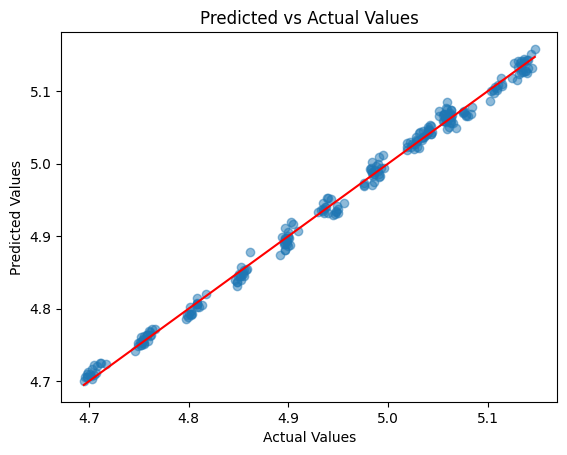

In [207]:
# Plot predicted values against the actual values
plt.scatter(y_test2, y_pred2, alpha = 0.5)
plt.plot([y2.min(), y2.max()], [y2.min(), y2.max()], color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

The best fit line looks to be much more in line compared to the first version.

In [208]:
# Getting info on the residuals
residuals_2 = y_test2 - y_pred2

residuals_2.describe()

count    250.000000
mean      -0.000211
std        0.008724
min       -0.025971
25%       -0.006340
50%       -0.000422
75%        0.006212
max        0.018735
Name: log_height, dtype: float64

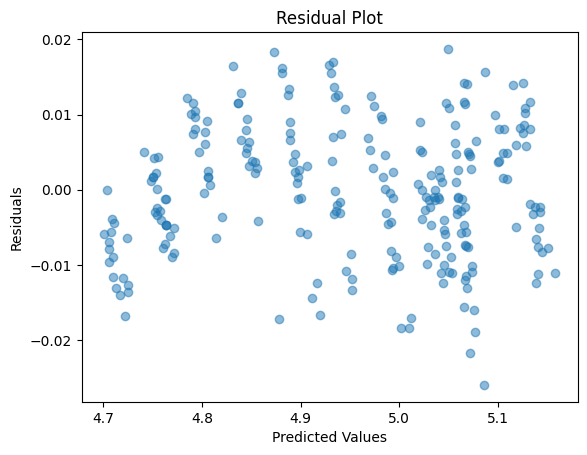

In [209]:
# Plotting the residuals

plt.scatter(y_pred2, residuals_2, alpha = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The residuals looks to now be totally scattered around randomly with no discernable trend which is what we want. We want this because this shows that the independent variables describe the relatipnship so thorughly that only random errors remain.

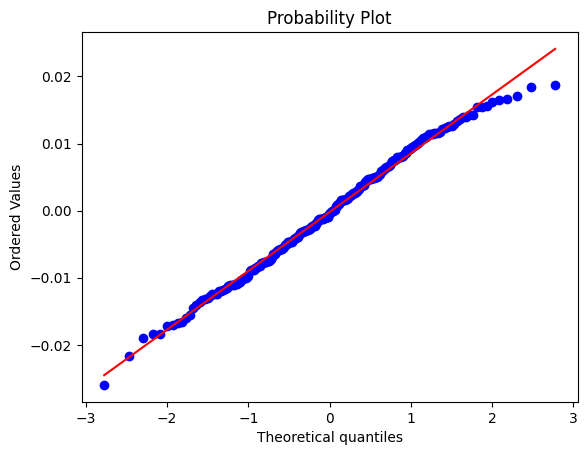

In [210]:
# Q-Q plot
stats.probplot(residuals_2, dist = 'norm', plot = plt);

The Q-Q plot looks to fit a lot better as well. There is still a little bit of a tail off at the top of the graph but residuals are a lot more normally distributed.

### Comparing Results

In [211]:
results_data = {'Model': ['Linear', 'Non-Linear'],
                  'R-Square':[r2, r2_2],
                  'Adjusted R-Square': [Adj_r2, Adj_r2_2],
                  'Mean Squared Error': [mse, mse_2],
                  'Root Mean Squared Error': [rmse, rmse_2],
                  'Mean Absolute Error': [mae, mae_2],
                  }

df_results = pd.DataFrame(results_data)

In [212]:
df_results.set_index('Model')

,R-Square,Adjusted R-Square,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
Model,,,,,
Linear,0.976042,0.975965,8.133097,2.851858,2.429384
Non-Linear,0.995707,0.995693,0.000076,0.008709,0.007161


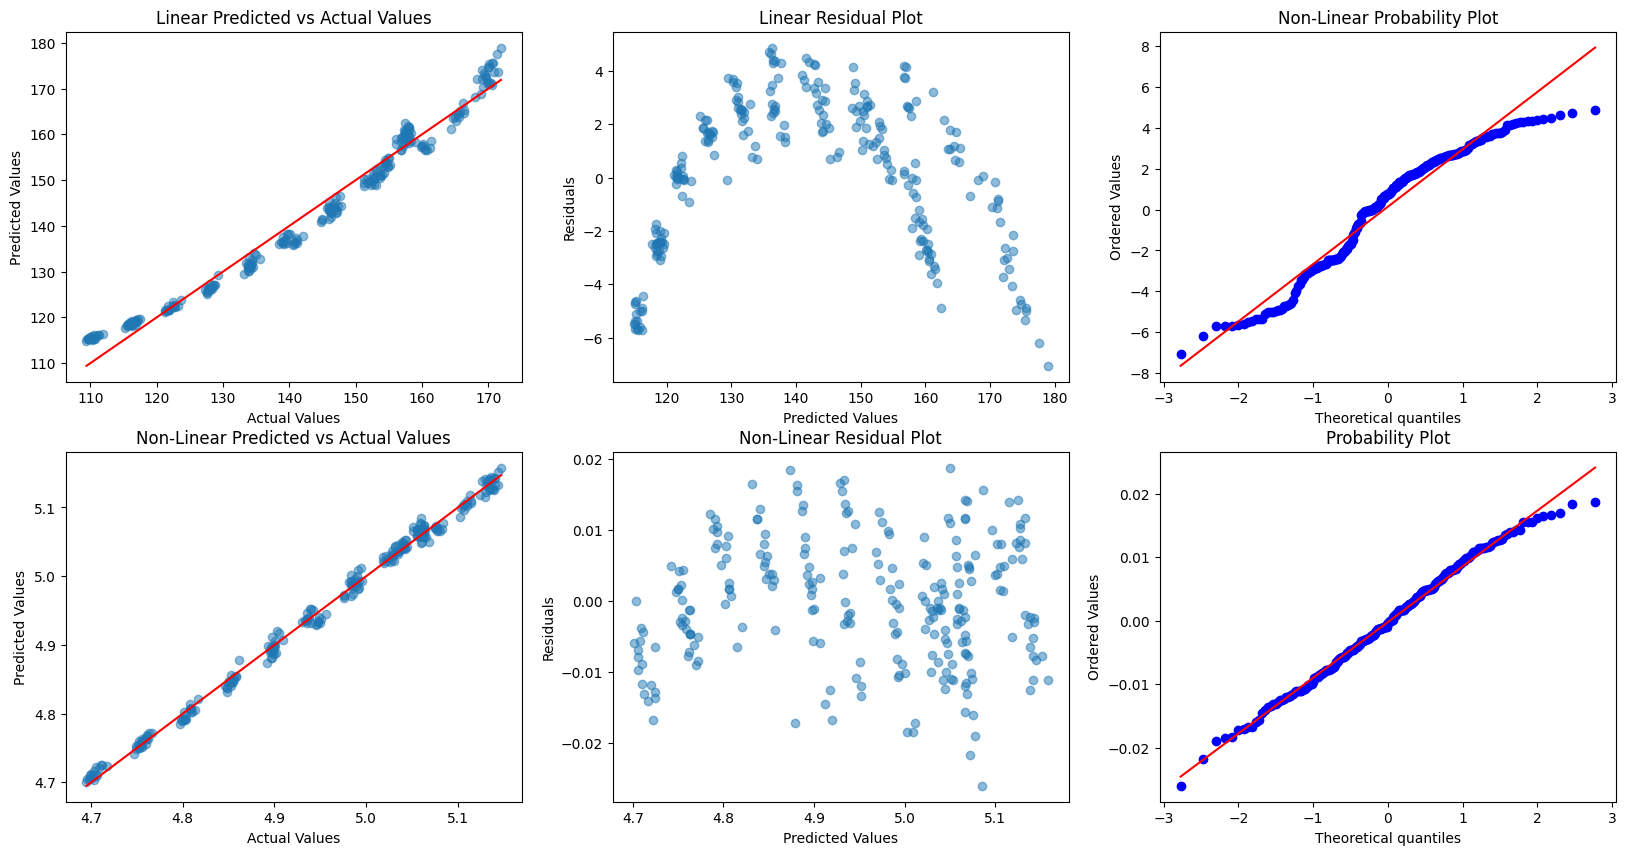

In [214]:
figure, axes = plt.subplots(2, 3, figsize = (20,10))

# linear regression
axes[0,0].scatter(y_test, y_pred, alpha = 0.5)
axes[0,0].plot([y.min(), y.max()], [y.min(), y.max()], color = 'red')
axes[0,0].set_xlabel('Actual Values')
axes[0,0].set_ylabel('Predicted Values')
axes[0,0].set_title('Linear Predicted vs Actual Values')

axes[0,1].scatter(y_pred, residuals, alpha = 0.5)
axes[0,1].set_xlabel('Predicted Values')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('Linear Residual Plot')

stats.probplot(residuals, dist = 'norm', plot = axes[0,2]);
axes[0,2].set_title('Linear Probability Plot')

# original regression
axes[1,0].scatter(y_test2, y_pred2, alpha = 0.5)
axes[1,0].plot([y2.min(), y2.max()], [y2.min(), y2.max()], color = 'red')
axes[1,0].set_xlabel('Actual Values')
axes[1,0].set_ylabel('Predicted Values')
axes[1,0].set_title('Non-Linear Predicted vs Actual Values')

axes[1,1].scatter(y_pred2, residuals_2, alpha = 0.5)
axes[1,1].set_xlabel('Predicted Values')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title('Non-Linear Residual Plot')

stats.probplot(residuals_2, dist = 'norm', plot = axes[1,2]);
axes[0,2].set_title('Non-Linear Probability Plot')

plt.show()

We saw that adding a log to both sides of the lienar regression gave us better results. In the linear regression model, the plotted residuals had a very distinct curve shape meaning that there was something up with the normality of the model. Adding a log to height and body weight improved overall results.